In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.arima.model import ARIMA

In [5]:
data = pd.read_csv("MLTempDataset1.csv")

In [6]:
data.drop("Unnamed: 0",axis = 1,inplace=True)

In [7]:
data["Datetime"] = pd.to_datetime(data["Datetime"])

In [8]:
data.set_index("Datetime",inplace=True)

In [9]:
data

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400
...,...
2022-10-24 19:00:00,25.567
2022-10-24 20:00:00,25.183
2022-10-24 21:00:00,24.600


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
sd = seasonal_decompose(data)

In [12]:
season = sd.seasonal
trend = sd.trend

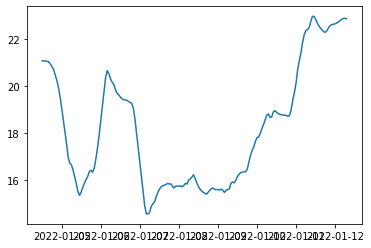

In [13]:
plt.plot(trend[:200])

In [14]:
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
p = pacf(data)
a = acf(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


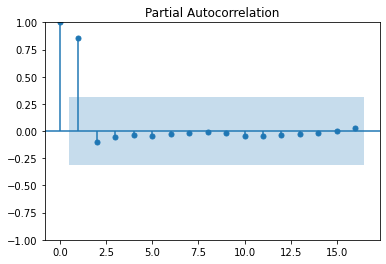

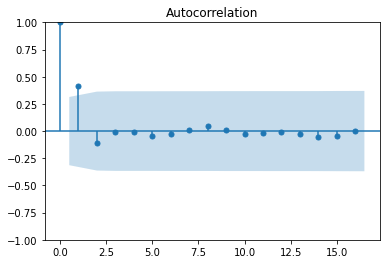

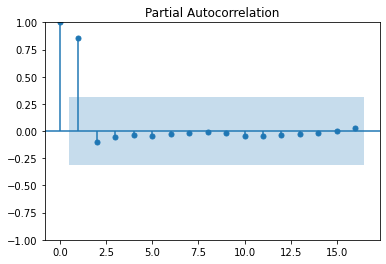

In [16]:
plot_acf(p)
plot_pacf(a)

In [21]:
data_new = data - data.shift(2)

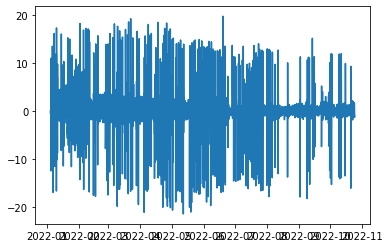

In [22]:
plt.plot(data_new)

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data[:6056],order=(2,0,2), seasonal_order=(6,1,6,4))
fitted = model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
fitted.forecast(1000)

2022-09-13 08:00:00     9.610563
2022-09-13 09:00:00    10.308048
2022-09-13 10:00:00    11.285089
2022-09-13 11:00:00    12.089558
2022-09-13 12:00:00    13.075890
                         ...    
2022-10-24 19:00:00    21.790952
2022-10-24 20:00:00    21.739589
2022-10-24 21:00:00    21.782347
2022-10-24 22:00:00    21.673023
2022-10-24 23:00:00    21.698626
Freq: H, Name: predicted_mean, Length: 1000, dtype: float64